In [41]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, tanh
from ipywidgets import interact
import sys
from os import path
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)



nu=2
Ls=6 # width of SC, try 6 for thin, 12 for thick

if nu==1:
    mu=0.3 
elif nu==2:
    mu=0.55
else:
    print('No data available')
    
Lx=8
Nx=200

out_dir = 'LL_bands/' 

# f1= 'nu_%.2f_Lxs_%d_%d_Nx_%d.npz' % (mu,Lx,Ls,Nx)
f1= 'bands_nu_%.2f_Lxs_%d_%d_Nx_%d.npz' % (mu,Lx,Ls,Nx)
fname = out_dir+f1

if path.exists(fname):
    npzfile = np.load(fname)
#     Vn=npzfile['evecs']
    En=npzfile['En']
    ky_sw=npzfile['kps']
    print('wf was loaded!')

wf was loaded!


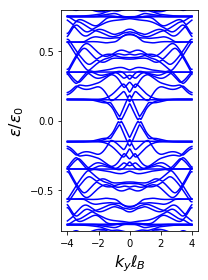

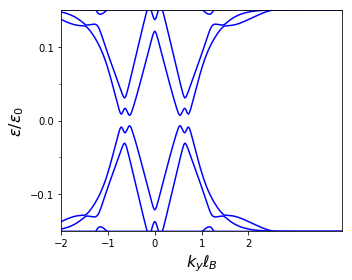

In [43]:
##### plot for notes
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3
vF=1e6
B=10 # Tesla
hwc=vF*sqrt(2*hbar*elec*B)

plt.figure(figsize=(3,4))
plt.plot(ky_sw*lB,En.T/hwc,'b')

fsize=16
plt.ylabel(r"$\varepsilon/\varepsilon_0$",fontsize = fsize)
plt.xlabel(r"$k_y \ell_B$",fontsize = fsize)
plt.ylim(-.8,.8)
# plt.xlim(-1,4)
plt.xticks(np.arange(-4,4.1,2))
plt.yticks(np.arange(-0.5,0.51,0.5))
# plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figs/TS_Hoppe_Nx_%d_nu_%.2f.pdf' % (Nx,nu))
plt.show()

plt.figure(figsize=(5,4))
plt.plot(ky_sw[:]*lB,En[:,:].T/hwc,'b')
fsize=16
plt.ylabel(r"$\varepsilon/\varepsilon_0$",fontsize = fsize)
plt.xlabel(r"$k_y \ell_B$",fontsize = fsize)
# plt.ylim(-.1,.1) # nu=1
plt.ylim(-.15,.15) # nu=2
plt.xlim(-2,4)
plt.yticks(np.arange(-0.1,0.11,.1))
plt.xticks(np.arange(-2,2.1,1))
ax=plt.axes()
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tight_layout()
plt.savefig('figs/TS_Hoppe_Nx_%d_nu_%.2f_zoomed.pdf' % (Nx,nu))
plt.show()

interactive(children=(Dropdown(description='i_band', options=(1599,), value=1599), IntSlider(value=100, descri…

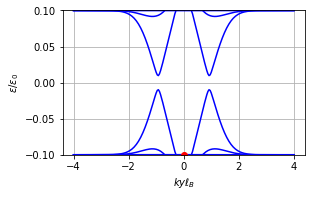

In [10]:
lB=np.sqrt(hbar/(elec*B))
Ls=6*lB
Lx=8*lB

def wf_real_space(ev,k,x,Ls):
    Nx=len(k)
    kt=np.reshape(k,[1,Nx])
    xt=np.reshape(x,[len(x),1])
    
    ev_p= ev[:8*Nx,:]
    ev_p_K1 = ev_p[:4*Nx,:]
    ev_p_K2 = ev_p[4*Nx:,:]
    ev_h= ev[8*Nx:,:]
    ev_h_K1 = ev_h[:4*Nx,:]
    ev_h_K2 = ev_h[4*Nx:,:]
    ## uA # uB # dA # dB
    return np.dot(np.exp(1j*kt*xt),ev_p_K1[0:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_p_K1[1:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_p_K1[2*Nx:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_p_K1[2*Nx+1:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_p_K2[0:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_p_K2[1:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_p_K2[2*Nx:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_p_K2[2*Nx+1:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K1[0:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K1[1:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K1[2*Nx:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K1[2*Nx+1:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K2[0:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K2[1:2*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K2[2*Nx:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0]),\
           np.dot(np.exp(1j*kt*xt),ev_h_K2[2*Nx+1:4*Nx:2,:])/np.sqrt(2*Lx+Ls)*np.sqrt(x[1]-x[0])


def plot_wf(i_band=Nx,iwf=int(len(ky_sw)/2)):
    
    plt.figure(figsize=(8,5))
    plt.subplot(2,2,1)
    plt.plot(ky_sw*lB,En.T/hwc,'b')
    plt.plot(ky_sw[iwf]*lB,En[i_band,iwf]/hwc,'ro')
    plt.ylabel(r"$\varepsilon/\varepsilon_0$")
    plt.xlabel("$ky \ell_B$")
    plt.ylim(-0.1,0.1)
    # plt.xlim(-7.5,7.5)
    plt.grid()
    #     plt.show()
    plt.tight_layout()

    x0=np.linspace(-1,1,500)*(Lx+Ls/2-lB)
    kx=2*pi*np.arange(Nx)/(2*Lx+Ls)-pi*Nx/(2*Lx+Ls)
    wfpK1_uA,wfpK1_uB, wfpK1_dA,wfpK1_dB,\
    wfpK2_uA,wfpK2_uB, wfpK2_dA,wfpK2_dB,\
    wfhK1_uA,wfhK1_uB, wfhK1_dA,wfhK1_dB,\
    wfhK2_uA,wfhK2_uB, wfhK2_dA,wfhK2_dB =wf_real_space(np.reshape(Vn[:,i_band-(8*Nx-1),:],[16*Nx,len(ky_sw)]),kx,x0,Ls)
#     plt.figure()
    plt.title(r'$ky \ell_B$=%.2f' % (ky_sw[iwf]*lB) )
    plt.subplot(2,2,3)
    plt.title('K')
    wfpK1_u=np.abs(wfpK1_uA[:,iwf])**2+np.abs(wfpK1_uB[:,iwf])**2
    wfpK1_d=np.abs(wfpK1_dA[:,iwf])**2+np.abs(wfpK1_dB[:,iwf])**2
    wfhK1_u=np.abs(wfhK1_uA[:,iwf])**2+np.abs(wfhK1_uB[:,iwf])**2
    wfhK1_d=np.abs(wfhK1_dA[:,iwf])**2+np.abs(wfhK1_dB[:,iwf])**2

    plt.plot(x0/lB,wfpK1_u,label=r'$e \uparrow$')
    plt.plot(x0/lB,wfpK1_d,label=r"$e \downarrow$")
    plt.plot(x0/lB,wfhK1_u,label=r'$h \uparrow$')
    plt.plot(x0/lB,wfhK1_d,label=r"$h \downarrow$")
    ymax=0.02 # maximum of wf plot
    ymin=-0.001 # minimum of wf plot
    plt.fill([-Ls/lB/2,Ls/lB/2,Ls/lB/2,-Ls/lB/2],[ymax,ymax,ymin,ymin],c='#ECECEC')
    plt.ylim(ymin,ymax)
    plt.xlabel(r'Position,x [$\ell_B$]')
    plt.tight_layout()

    plt.legend()
    plt.subplot(2,2,4)
    plt.title("K'")
    wfpK2_u=np.abs(wfpK2_uA[:,iwf])**2+np.abs(wfpK2_uB[:,iwf])**2
    wfpK2_d=np.abs(wfpK2_dA[:,iwf])**2+np.abs(wfpK2_dB[:,iwf])**2
    wfhK2_u=np.abs(wfhK2_uA[:,iwf])**2+np.abs(wfhK2_uB[:,iwf])**2
    wfhK2_d=np.abs(wfhK2_dA[:,iwf])**2+np.abs(wfhK2_dB[:,iwf])**2

    plt.plot(x0/lB,wfpK2_u,label=r'$e \uparrow$')
    plt.plot(x0/lB,wfpK2_d,label=r"$e \downarrow$")
    plt.plot(x0/lB,wfhK2_u,label=r'$h \uparrow$')
    plt.plot(x0/lB,wfhK2_d,label=r"$h \downarrow$")
    plt.fill([-Ls/lB/2,Ls/lB/2,Ls/lB/2,-Ls/lB/2],[ymax,ymax,ymin,ymin],c='#ECECEC')
    plt.ylim(ymin,ymax)
    plt.xlabel(r'Position,x [$\ell_B$]')
    plt.tight_layout()

    plt.legend()
    plt.show()

interact(plot_wf,iwf=(0,len(ky_sw)-1,1), i_band=range(8*Nx-1,8*Nx));

